# Data Scientist Professional Case Study
## By Aldair Mendoza

### Company Background

Tasty Bytes , an online recipe startup, has hired you as a data scientist. The website features new recipes on the homepage every day. The owner has told you that on days that they feature a popular recipe, traffic increases by as much as 40%. However, it is difficult to predict in advance which recipes will be popular.

Recipes are considered to be popular if they receive a high score. The data team has collected data from previously published recipes.


### Customer Question

The owner wants to know:
- Can you use information on previously published recipes to predict whether a recipe will receive a high score?



### Success Criteria

**The owner estimates that of all low scoring recipes, they currently correctly categorize 75% of them.** They want to know how your approach compares to this.

In order to predict whether or not a recipe will receive a low score, we need to preprocess the data. However, let's figure out what is the challenge about. The data have labeled data where 1 is a high score, and 0 is a low score. Than means, we are going to predict if a recipe will be unpopular. Hence, it is a binary classification challenge.

**OBJECTIVE: Create a binary classification model to predict low scoring recipes. This means, that the model should have a good rate of Negative Predictive Value.**


### Dataset

* **`RecipeId`:** Unique identifier of recipe.
* **`Name`:** Name of recipe.
* **`RecipeCategory`:** Type of recipe. (Dessert, Breakfast, etc)
* **`Calories`:** Number of calories.
* **`CholesterolContent`:** Amount of cholesterol in milligrams.
* **`CarbohydrateContent`:** Amount of carbohydrates in grams.
* **`SugarContent`:** Amount of sugar in grams.
* **`ProteinContent`:** Amount of protein in grams.
* **`RecipeServings`:** Number of servings.
* **`HighScore`:** Where 1 is a high score and 0 is a low score.

# 1. Data Cleaning

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

seed = 123
recipes = pd.read_csv("data/recipes.csv")
recipes.head()

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,46085,Crock Pot Baked Potato Soup,One Dish Meal,699.8,137.3,46.1,1.4,20.9,6.0,1.0
1,93832,Frittata Di Spaghetti (spaghetti Frittata),Breakfast,297.1,191.8,11.7,0.7,12.2,8.0,1.0
2,36034,Berries With Italian Cream,Dessert,131.9,23.3,10.3,4.4,9.1,6.0,0.0
3,329988,Pork Tenderloin Medallions With Fresh Figs,< 15 Mins,203.0,74.8,1.5,0.6,23.3,4.0,1.0
4,59886,Kaseropita (Tiropita Using Kaseri Cheese),Savory Pies,261.6,103.6,20.9,0.2,6.7,15.0,1.0


In [2]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43092 entries, 0 to 43091
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecipeId             43092 non-null  int64  
 1   Name                 43092 non-null  object 
 2   RecipeCategory       43052 non-null  object 
 3   Calories             43092 non-null  float64
 4   CholesterolContent   43092 non-null  float64
 5   CarbohydrateContent  43092 non-null  float64
 6   SugarContent         43092 non-null  float64
 7   ProteinContent       43092 non-null  float64
 8   RecipeServings       43092 non-null  float64
 9   HighScore            43092 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.3+ MB


**Observation:**
> It seems that there are not null values. However, let's explore more further.

In [2]:
recipes.describe()

,RecipeId,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
count,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000,43092.000000
mean,224707.928154,353.297587,69.475757,32.844187,12.206600,15.773125,9.517521,0.645735
std,141980.914350,405.065683,112.422309,46.428258,28.304371,21.588594,224.022873,0.478296
min,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,102616.750000,164.800000,4.500000,11.600000,2.200000,3.400000,4.000000,0.000000
50%,212333.000000,284.100000,40.700000,25.400000,5.500000,8.800000,6.000000,1.000000
75%,336736.250000,446.725000,95.900000,43.400000,14.100000,24.300000,8.000000,1.000000
max,540876.000000,30933.400000,9167.200000,3564.400000,2566.800000,1420.800000,32767.000000,1.000000


**Observation:**
> In this case the zero values are missing data, and there a big number of outliers.

In [4]:
recipes['RecipeCategory'].nunique()

246

**Observation:**
> There are too many categories in `RecipeCategory` column. This feature will not be needed for the model.

In [5]:
recipes['Name'].nunique()

41240

**Observation:**
> There are too many recipe names in `Name` column. This feature will not also be needed for the model.

## 1.1. Handling missing values

In [6]:
recipes[recipes == 0].count()

RecipeId                   0
Name                       0
RecipeCategory             0
Calories                 188
CholesterolContent      8655
CarbohydrateContent      416
SugarContent             932
ProteinContent           646
RecipeServings             0
HighScore              15266
dtype: int64

**Observation:**

There missing values on the columns: Calories, CholesterolContent, CarbohydrateContent, SugarContent, ProteinContent.

Logically, any recipe would have a minimal amount of calories, grams of carbohydrates, protein, sugar, or cholesterol. That's why we are going to fill the missing values with the mean of each column.

In [18]:
# We cannot replace `HighScore` 0 values with nan, that is why we are going to change values as strings
recipes['HighScore'] = recipes['HighScore'].map({1:'HighScore', 0: 'LowScore'})
recipes['HighScore'].value_counts()

HighScore    27826
LowScore     15266
Name: HighScore, dtype: int64

In [19]:
# Replacing 0 to column mean values on features columns
cols = ['Calories', 'CholesterolContent', 'CarbohydrateContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'HighScore']
variables = recipes[cols].replace(0, recipes[cols].mean()) 
variables.sample(10)

,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
12838,52.3,69.475757,5.2,1.5,1.1,8.0,LowScore
30351,196.4,68.400000,6.2,2.4,28.9,4.0,LowScore
15053,369.8,30.000000,59.5,7.7,12.1,3.0,HighScore
21576,65.9,69.475757,16.5,13.8,0.6,4.0,LowScore
24470,450.6,84.600000,38.5,1.6,30.8,4.0,LowScore
7429,350.0,84.200000,24.6,5.8,36.6,8.0,LowScore
16446,436.7,98.400000,24.7,4.5,32.2,4.0,LowScore
28822,133.4,48.900000,2.4,0.5,20.7,4.0,LowScore
15104,338.9,84.800000,12.5,3.9,11.2,10.0,HighScore
19747,277.8,255.100000,4.2,1.7,16.7,8.0,HighScore


In [4]:
# Mapping to binary values 
variables['HighScore'] = variables['HighScore'].map({'HighScore':1, 'LowScore': 0})
variables['HighScore'].value_counts()

1    27826
0    15266
Name: HighScore, dtype: int64

> **Missing values handled!**

<AxesSubplot:>

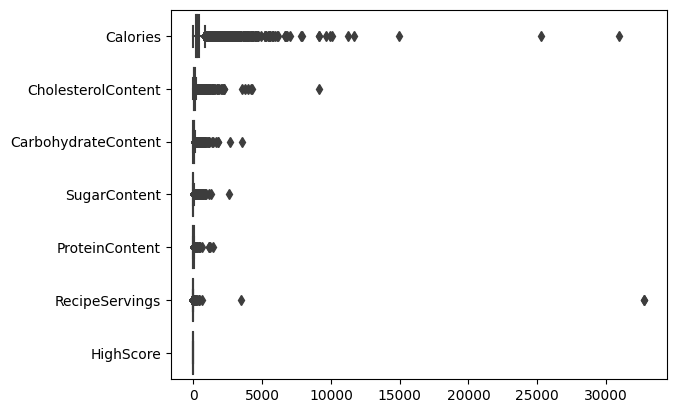

In [5]:
recipes_num = variables.copy()
recipes_num.drop('HighScore', axis=1)
sns.boxplot(data=recipes_num, orient='h')

**Observation:**
> The numeric columns have a lot of outliers. We need to treat them correctly.
## 1.2. Handling Outliers

In order to handle outliers, we are going to remove outliers with 3 standard deviations. 

In [20]:
# Define outliers in order to return the list of indexes of outliers
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 # 
    lower_bound = Q1 - 3 * IQR 
    upper_bound = Q3 + 3 * IQR
    index_ls = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return index_ls

# Remove outliers
def remove_outliers(df, indexes):
    indexes = sorted(set(indexes))
    df = df.drop(indexes)
    return df

In [21]:
index_list = []

cols = ['Calories', 'CholesterolContent', 'CarbohydrateContent', 'SugarContent', 'ProteinContent', 'RecipeServings']
for col in cols:
    index_list.extend(outliers(variables, col))
len(index_list)

6497

**Observation:**
> There are a total of 6497 outliers.

In [8]:
recipes_cleaned = remove_outliers(variables, index_list)
recipes_cleaned.shape

(37689, 7)


> **Outliers Handled!** 

**Observation:**

Much better! We removed outliers with the IQR method. (As the data have 37689 rows, removing outliers would not be a problem because we have sufficient data to create a model.)

## 1.2. Class Imbalance

Percentage of recipes with High Score:  0.6422563612725198
Quantity of recipes with High Score:  24206
Percentage of recipes with Low Score:  0.35774363872748016
Quantity of recipes with Low Score:  13483


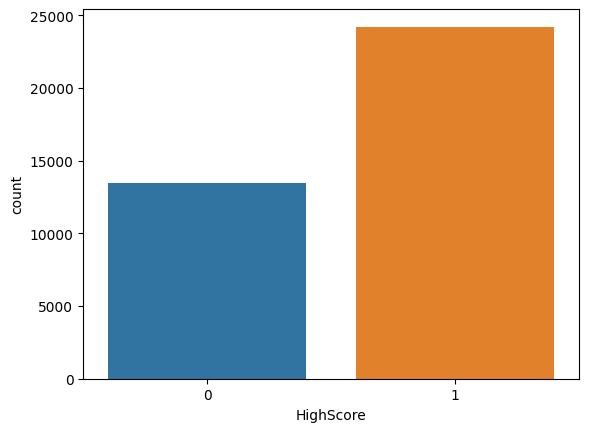

In [16]:
sns.countplot(x='HighScore', data=recipes_cleaned)
high_score, low_score = recipes_cleaned['HighScore'].value_counts(normalize=True)
high_score_q , low_score_q = recipes_cleaned['HighScore'].value_counts()
print("Percentage of recipes with High Score: ", high_score)
print("Quantity of recipes with High Score: ", high_score_q)
print("Percentage of recipes with Low Score: ", low_score)
print("Quantity of recipes with Low Score: ", low_score_q)

**Observation:**
> **We are dealing with imbalaced target variable, we need to handle this!**

**SOLUTION: We want each subgroup to have equal weight in our analysis. Then, using oversampling or undersampling will be the appropriate technique for this situation. However, we are going to solve this problem in the Preprocessing Data section**

# 2. Exploratory Data Analysis

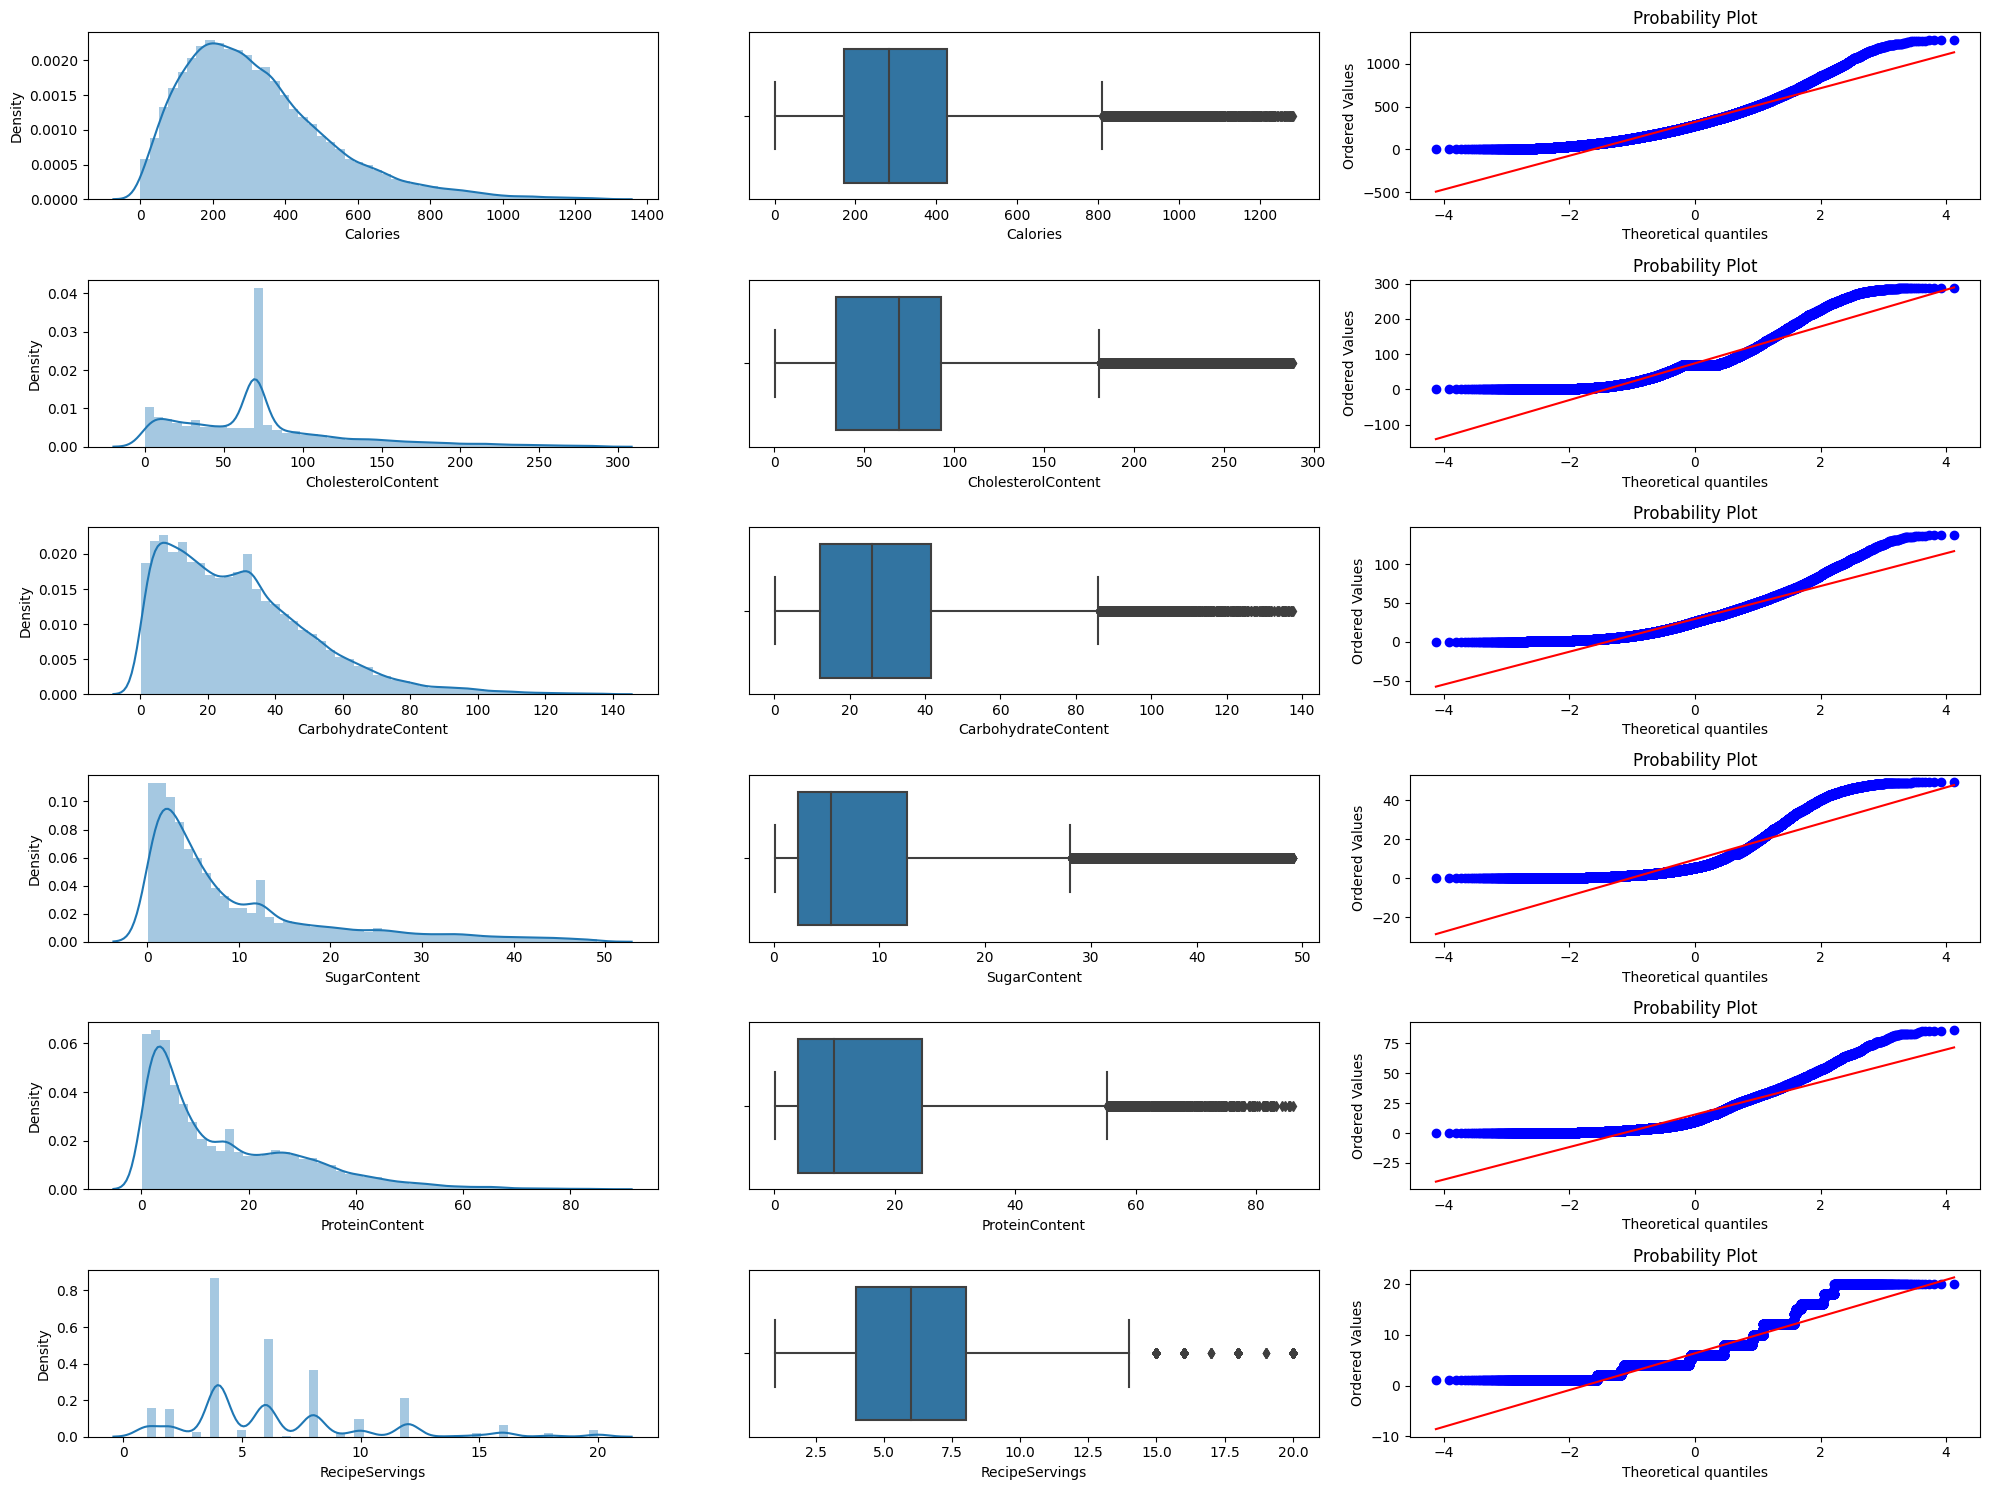

In [17]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(6,3,figsize=(20,15))
for index,i in enumerate(recipes_cleaned[cols]):
    sns.distplot(recipes_cleaned[i],ax=ax[index,0])
    sns.boxplot(recipes_cleaned[i],ax=ax[index,1])
    stats.probplot(recipes_cleaned[i],plot=ax[index,2])
    
fig.tight_layout()


In [18]:
print(f'Column Skewness\n{recipes_cleaned.skew(axis=0).sort_values()}')

Column Skewness
HighScore             -0.593579
CarbohydrateContent    1.109764
Calories               1.119714
CholesterolContent     1.235669
ProteinContent         1.265534
RecipeServings         1.284604
SugarContent           1.649817
dtype: float64


**Observation:**
> Note it seems that almost all variables are kind of right skewed. See the skewness value. 

In [2]:
data_cleaned = data[(data.zscore>-3) & (df.zscore<3)]
data_cleaned

NameError: name 'data' is not defined

Text(0.5, 1.0, 'Correlation Matrix')

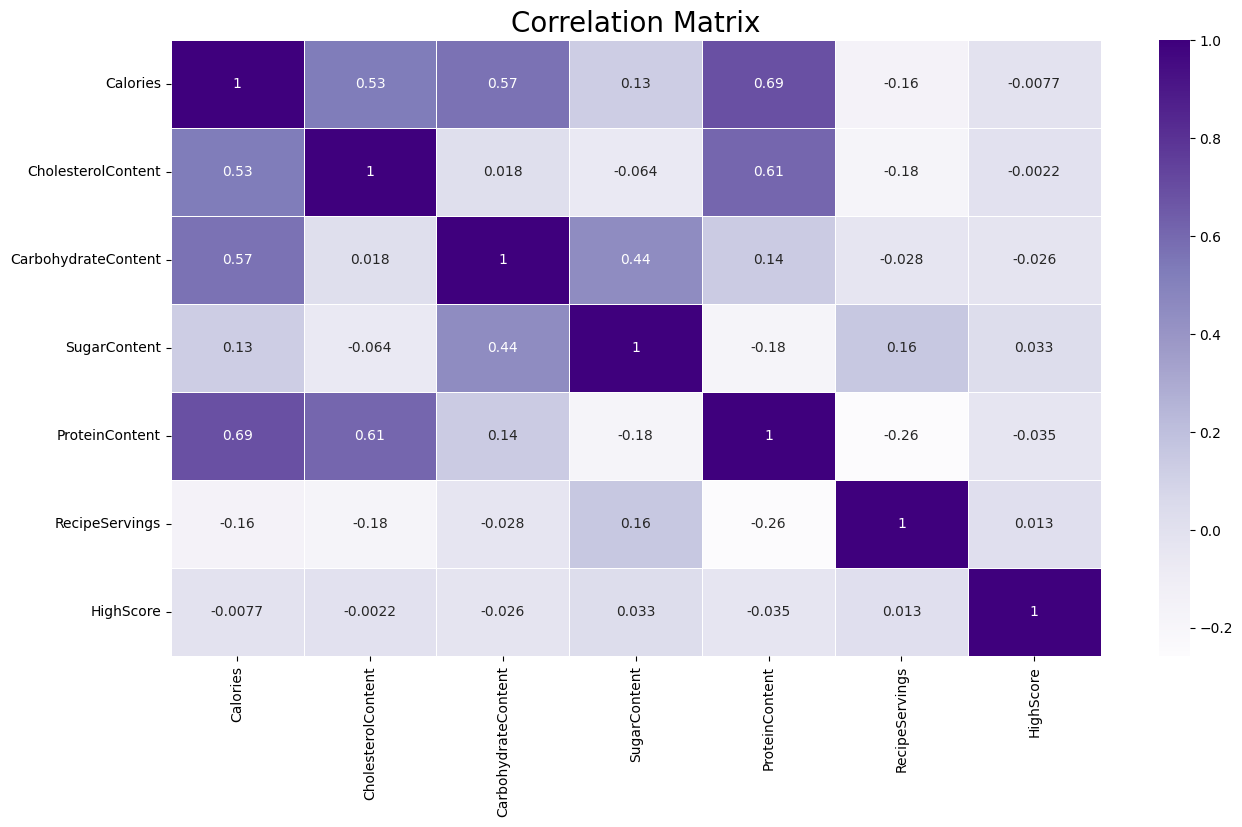

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(recipes_cleaned.corr(), annot=True,linewidths=.5, cmap="Purples")
plt.title("Correlation Matrix", size=20)

**Observation:**
> Correlation matrix is shown. See that there is no correlation between feature variables and the target variable.

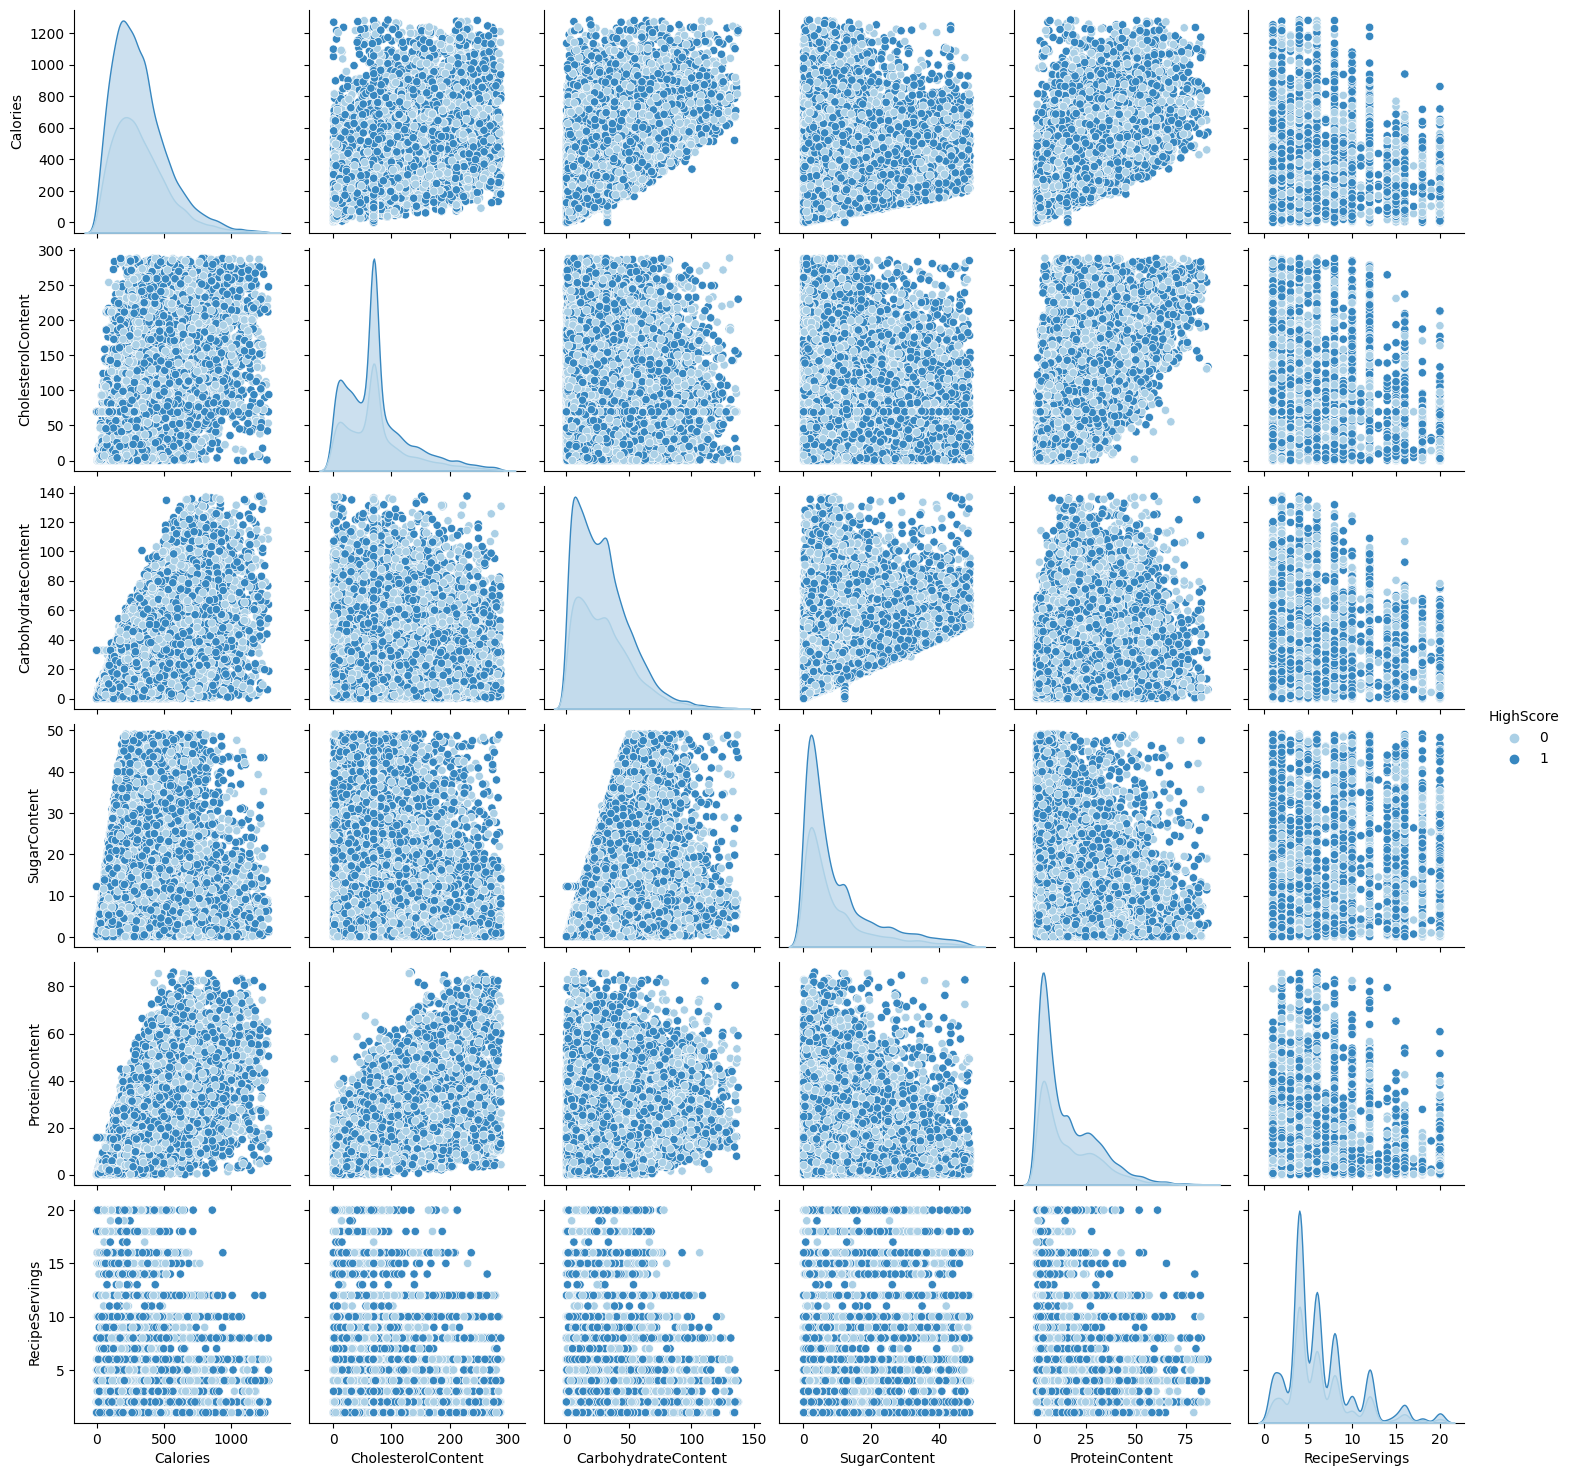

In [20]:
num_col = ['Calories', 'CholesterolContent', 'CarbohydrateContent', 'SugarContent',
'ProteinContent', 'RecipeServings', 'HighScore']
sns.pairplot(recipes_cleaned[num_col], hue = 'HighScore', palette='Blues')

**Observation:**
> See the target value, the data is very scattered.

# 2. Preprocessing Data 

The requirements are:
* Numeric data.
* No missing values.


## 2.1. Separating Independent and Dependent Variables

In [17]:
recipes_cleaned.isna().sum()

Calories               0
CholesterolContent     0
CarbohydrateContent    0
SugarContent           0
ProteinContent         0
RecipeServings         0
HighScore              0
dtype: int64

> **There are no missing values!**

In [9]:
recipes_cleaned.sample(5)

,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
21543,690.8,42.3,88.0,49.1,7.6,10.0,0
2396,526.9,170.6,8.6,3.9,34.4,6.0,0
27874,232.0,33.4,21.5,3.2,10.1,8.0,1
7508,299.9,117.7,52.5,32.0,6.8,8.0,0
21292,222.0,32.1,8.5,2.8,4.3,6.0,0


> **Every column has numeric data!**

In [31]:
X = recipes_cleaned.drop('HighScore', axis=1)
y = recipes_cleaned['HighScore']
X.shape, y.shape

((37689, 6), (37689,))

## 2.2. Solving Imbalance Data (Over-Sampling)

We are using Over-Sampling with the aim that any model should have a better response.

In [32]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state=seed)

# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_rus))

original dataset shape: Counter({1: 24206, 0: 13483})
Resample dataset shape: Counter({1: 24206, 0: 24206})


In [33]:
X_rus.shape, y_rus.shape

((48412, 6), (48412,))

> **Class Imbalance solved!**

## 2.3 Scaling features

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Spliting data into training 85% and testing 15% 
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.15, random_state=seed)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
np.std(X_train), np.std(X_test)

(0.9999999999999999, 1.0)

> The standard deviation of feature variables are almost 1, that means that the features are normalized.

# 3. Data Modeling
##  3.1. A Classification Model Comparison 

We are using StratifiedKFold because we have a class imbalance.

In [52]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression

models['Logistic Regression'] = LogisticRegression(random_state=seed)

# Support Vector Machines
from sklearn.svm import LinearSVC

models['Support Vector Machines'] = LinearSVC(random_state=seed)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier

models['Decision Trees'] = DecisionTreeClassifier(random_state=seed)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

models['Random Forest'] = RandomForestClassifier(random_state=seed)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

models['K-Nearest Neighbor'] = KNeighborsClassifier()

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    y_pred = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(y_pred, y_test)
    precision[key] = precision_score(y_pred, y_test)
    recall[key] = recall_score(y_pred, y_test)
    
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model

,Accuracy,Precision,Recall
Logistic Regression,0.528367,0.570474,0.520987
Support Vector Machines,0.528505,0.570474,0.521120
Decision Trees,0.637703,0.624513,0.636028
Random Forest,0.749105,0.755432,0.741794
Naive Bayes,0.521482,0.510585,0.516193
K-Nearest Neighbor,0.579455,0.537326,0.580674


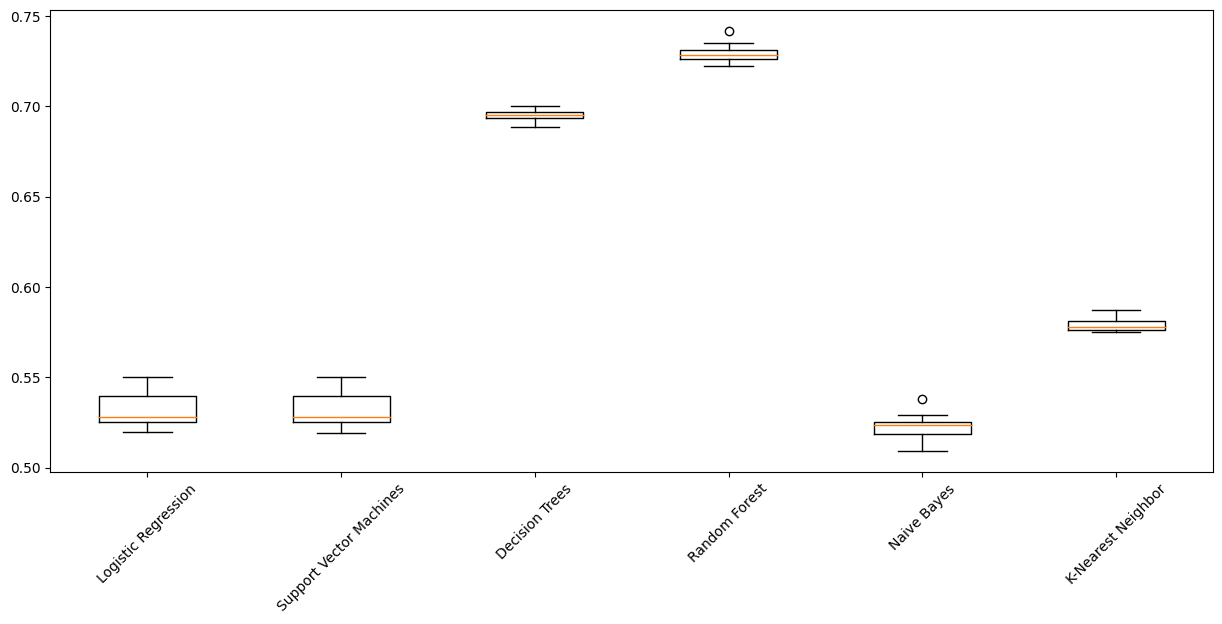

In [54]:
results = []

for model in models.values():     
    kf = StratifiedKFold(n_splits=8, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
    
# Ploting a boxplot comparison between models
plt.figure(figsize=(15,6))
plt.boxplot(results, labels=models.keys())
plt.xticks(rotation=45)
plt.show()

**Observation:**

**Note that `Random Forest Classifier` is the best performing model!**

In [53]:
# Printing all confusion matrix of models
for name, model in models.items():  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)
    print("{} Confusion Matrix: 																									\
          {}".format(name, matrix))

Logistic Regression Confusion Matrix: 																									          [[1789 1883]
 [1542 2048]]
Support Vector Machines Confusion Matrix: 																									          [[1790 1882]
 [1542 2048]]
Decision Trees Confusion Matrix: 																									          [[2389 1283]
 [1348 2242]]
Random Forest Confusion Matrix: 																									          [[2728  944]
 [ 878 2712]]
Naive Bayes Confusion Matrix: 																									          [[1954 1718]
 [1757 1833]]
K-Nearest Neighbor Confusion Matrix: 																									          [[2279 1393]
 [1661 1929]]


In [55]:
# Classification report of all models
for name, model in models.items():  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("{} Confusion Matrix: 																									\ {}".format(name, report))

Logistic Regression Confusion Matrix: 																									\               precision    recall  f1-score   support

           0       0.54      0.49      0.51      3672
           1       0.52      0.57      0.54      3590

    accuracy                           0.53      7262
   macro avg       0.53      0.53      0.53      7262
weighted avg       0.53      0.53      0.53      7262

Support Vector Machines Confusion Matrix: 																									\               precision    recall  f1-score   support

           0       0.54      0.49      0.51      3672
           1       0.52      0.57      0.54      3590

    accuracy                           0.53      7262
   macro avg       0.53      0.53      0.53      7262
weighted avg       0.53      0.53      0.53      7262

Decision Trees Confusion Matrix: 																									\               precision    recall  f1-score   support

           0       0.64      0.65      0.64      3672
           1       0.64      0.62      0.63

## 3.2. A Random Forest Classification Approach

We've noticed that the Random Forest Classification is the best performing model. With this in mind, we need to improve this model with Hyperparameter Tuning. But first, let's see each parameter individually.

### 3.2.1. `max_samples` Tuning

We are using RepeatedStratifiedKFold beacuse it allows improving the estimated performance.

>0.1 0.613 (0.007)
>0.2 0.650 (0.008)
>0.3 0.671 (0.008)
>0.4 0.685 (0.008)
>0.5 0.694 (0.009)
>0.6 0.697 (0.009)
>0.7 0.701 (0.010)
>0.8 0.704 (0.009)
>0.9 0.706 (0.009)
>1.0 0.708 (0.010)


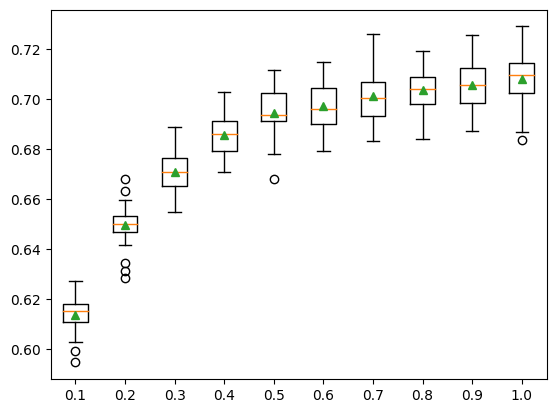

In [34]:
from sklearn.model_selection import RepeatedStratifiedKFold
# Get a list of models to evaluate
def get_models():
	models = dict()
	# Explore ratios from 10% to 100% in 10% increments
	for i in np.arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# Set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(random_state=seed, max_samples=i)
	return models
 
# Evaluate a Random Forest using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# Get the model to evaluate
models = get_models()
# Store results
results, names = list(), list()
for name, model in models.items():
	# Evaluate the model
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

**Observation:**
> The best parameter value is `1.0`
### 3.2.2. `max_features` Tuning

>1 0.710 (0.009)
>2 0.709 (0.009)
>3 0.706 (0.010)
>4 0.705 (0.009)
>5 0.704 (0.009)
>6 0.704 (0.009)
>7 0.703 (0.007)


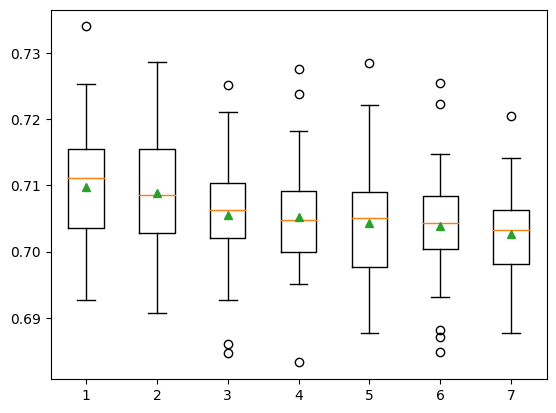

In [73]:
# Get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1,8):
		models[str(i)] = RandomForestClassifier(max_features=i)
	return models

models = get_models()

# evaluate the Random Forest models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

**Observation:**
> The best parameter value is `1`
### 3.2.3. `max_depth` Tuning

>1 0.524 (0.008)
>2 0.526 (0.007)
>3 0.529 (0.007)
>4 0.536 (0.007)
>5 0.544 (0.008)
>6 0.551 (0.008)
>7 0.560 (0.007)
>None 0.709 (0.010)


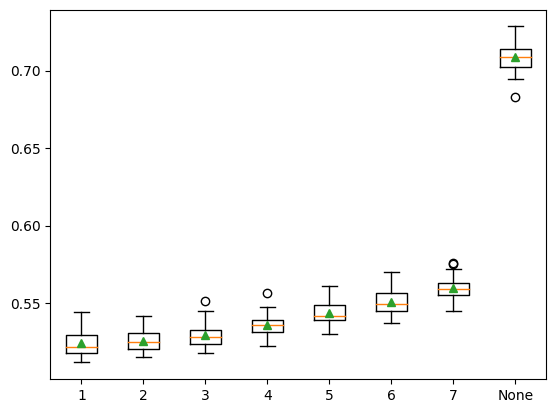

In [74]:
# Get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [i for i in range(1,8)] + [None]
	for n in depths:
		models[str(n)] = RandomForestClassifier(max_depth=n)
	return models

models = get_models()

# Evaluate the Random Forest models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

**Observation:**
> `None` value is the best parameter!
### 3.2.3. `n_estimators` Tuning

>200 0.713 (0.010)
>300 0.715 (0.010)
>500 0.716 (0.010)
>600 0.715 (0.010)
>800 0.716 (0.009)


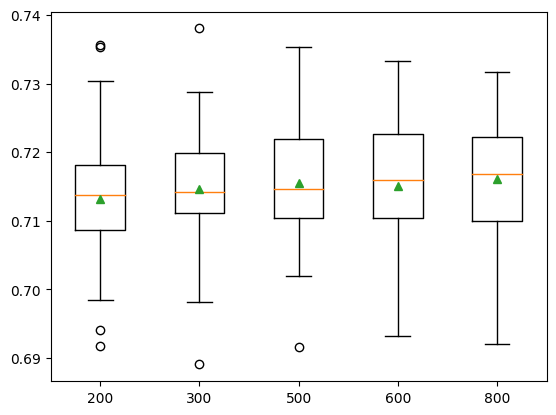

In [75]:
# Get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [200, 300, 500, 600, 800]
	for n in n_trees:
		models[str(n)] = RandomForestClassifier(n_estimators=n)
	return models


models = get_models()

# evaluate the Random Forest models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

**Observation:**
> The optimal number of estimators is 500. However, I've tried with 400 and 450 `n_estimators`, and the best parameter value is 400!
### 3.2.4. Random Forest C. Hyper Parameter Tuning with GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameters
parameters = {
    "max_features":[1,3,6,9],
    "max_samples":[0.2,0.4,0.6,0.8,1.0]
}

rf = RandomForestClassifier(random_state=seed)

# Build the gridsearch
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train,y_train)
y_pred=cv.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7351896224076675


In [128]:
print(f'Best parameters are: {cv.best_params_}')

Best parameters are: {'max_features': 1, 'max_samples': 1.0}


**Observation:**
> As expected, the optimal parameters for the model are `max_features`: 1, `max_samples`: 1.0


In [56]:
# Perform a Random Forest model with hyperparameters tuned.
rf = RandomForestClassifier(random_state=seed, max_samples=1.0, max_features=1, n_estimators=400)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7557146791517488


In [57]:
# Classification report of the Random Forest model tuned
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      3672
           1       0.74      0.78      0.76      3590

    accuracy                           0.76      7262
   macro avg       0.76      0.76      0.76      7262
weighted avg       0.76      0.76      0.76      7262



**Observation:**

> **We achieved a 75.57% of accuracy with hyperparameter tuning!**

> **Notice that we have a precision value of 0.77 and a recall value of 0.73 for 0 class. We will compare these values with the success criteria soon!**

### 3.2.5. Feature Importances

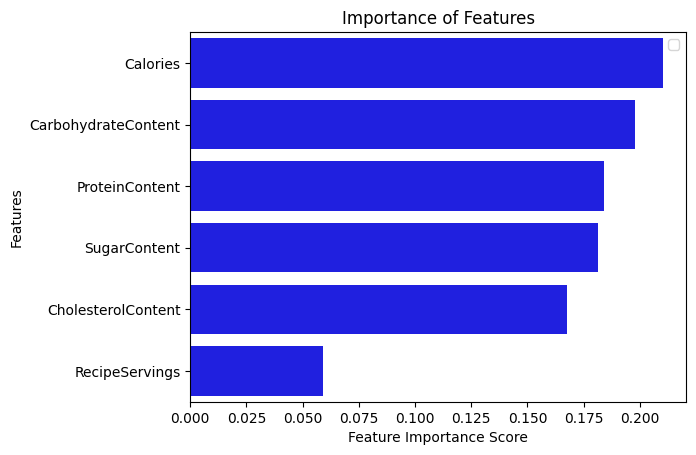

In [58]:
feature_imp = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)
# Plot feature importances
sns.barplot(x=feature_imp, y=feature_imp.index, color='blue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Importance of Features")
plt.legend()
plt.show()

In [59]:
feature_imp

Calories               0.210189
CarbohydrateContent    0.198034
ProteinContent         0.184093
SugarContent           0.181352
CholesterolContent     0.167440
RecipeServings         0.058892
dtype: float64

**Observation:**
> **We can see that the most important features are `Calories`, `CarbohydrateContent`, `ProteinContent`, `SugarContent`, `CholesterolContent`, except `RecipeServings` which has a low value.**
### 3.2.6. Confusion Matrix

In [60]:
# Consufion Matrix of the Random Forest model tuned
confusion_matrix(y_test, y_pred)

array([[2686,  986],
       [ 788, 2802]])

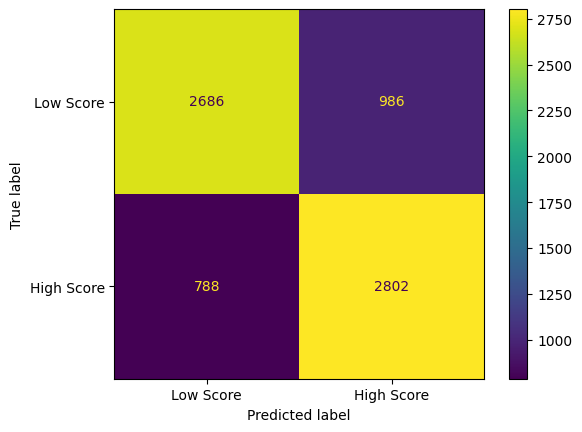

In [61]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Low Score', 'High Score'])
# Plot the confusion matrix
disp.plot()

In [62]:
# Extracting values of confusion matrix
tn, fp, fn, tp = cm.ravel()
s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)
print(s)


True Negatives: 2686
False Positives: 986
False Negatives: 788
True Positives: 2802



### 3.2.7. ROC Curve

To assess how well a Random Forest Classification model fits the dataset, we can look at the following two metrics:

$Recall$ / $Sensitivity$ / $True$ $Positive$ $Rate$ = $\frac{TP}{TP + FN}$

$Specificity$ / $True$ $Negative$ $Rate$ = $\frac{TN}{TN + FP}$

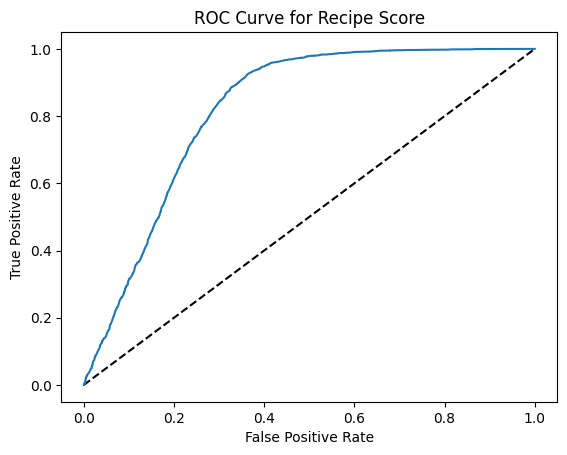

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

# Generate ROC curve values: fpr, tpr, thresholds
y_pred_probs = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot ROC Curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Recipe Score')
plt.show()

In [64]:
auc = roc_auc_score(y_test, y_pred_probs)
print("The ROC AUC Score is:", auc)

The ROC AUC Score is: 0.8195811031004789


**Observation:**

> **A ROC AUC score of 0.8196 means The Random Forest C. model is almost 62% better than a chance model at correctly predicting labels!** 
The model is much better than randomly guessing the recipe score of each observation.

In [65]:
def metrics(tn, fp, fn, tp):
    sen = tp / (tp + fn)
    print("Sensitivity: {0}".format(sen*100))
    spe = tn / (tn + fp)
    print("Specificity: {0}".format(spe*100))

metrics(tn, fp, fn, tp)

Sensitivity: 78.05013927576601
Specificity: 73.14814814814815


**Observation:**

**Sensitivity:**  The proportion of getting a High Score recipe and it gets correctly classified is 78.05%!

**Specificity:** The proportion of getting a Low Score recipe and it gets correctly classified is 73.15%!


###  3.2.8. Other Metrics

$Negative$ $Predictive$ $Value$ = $\frac{TN}{TN + FN}$

$Precision$ = $Positive$ $Predictive$ $Value$ = $\frac{TP}{TP + FP}$

In [66]:
def predictive_values(tn, fp, fn, tp):
    precision = tp / (tp + fp)
    print("Positive Predictive Value: {0}".format(precision*100))
    npv = tn / (tn + fn)
    print("Negative Predictive Value: {0}".format(npv*100))
    
predictive_values(tn, fp, fn, tp)

Positive Predictive Value: 73.97043294614572
Negative Predictive Value: 77.31721358664365


**Observation:**

> **The probability of the negative results (Low Score) which were correctly identified as Low Score is 77.32%, and viceversa, the probability for positive results (High Score) is 73.97%.**


## 3.3. Comparison with Success Criteria (75% Low Score)

**In the context of the success criteria, we are more interested in the Sensitivity and Negative Predictive Value metrics.** 

> A True Negative Rate (TNR or Sensitivity) can be defined as the proportion of correctly predicted "LowScore Recipes" which are real "LowScore Recipes". On the other hand, a Negative Predictive Value is the probability that following a Low Score test result, that recipe will truly get a Low Score.

In [67]:
predictive_values(tn, fp, fn, tp)
metrics(tn, fp, fn, tp)

Positive Predictive Value: 73.97043294614572
Negative Predictive Value: 77.31721358664365
Sensitivity: 78.05013927576601
Specificity: 73.14814814814815


> **We have reached a 73.14% of correctly classifying Low Scoring recipes which is 1.86% less than 75%.**

> **However, comparing the Negative Predictive Value to the success criteria, we improved the probability of classifying correctly a low scoring recipe in 2.32%!**

### 3.2.1. Another point of view (Recommendations)

***We know that if a popular recipe is featured, traffic increases by as much as 40%. With this in mind, it is more essential to correctly classify a High Scoring recipe because in that way we would get more chances to get 40% more traffic for future recipes. The model has classified correctly 78.05% of "High Score" recipes, it means that we have more probabilities for getting more traffic in the future. That is why, it is proposed focusing on predicting high scoring recipes.***


# 4. Conclusions

In conclusion, the data was cleaned handling missing values, and outliers. Furthermore, the data was preproccesed oversampling observations because of an imbalance in data, and finally scaling features. In summary, found that the best performing model was a Random Forest Classification approach which has achieved:

1. A 75.57% accuracy with hyperparameter tuning.
2. Finding that the most important features are: `Calories`, `CarbohydrateContent`, `ProteinContent`, `SugarContent`, `CholesterolContent`, in that order.
3. Evaluating the ROC Curve with a Sensitivity score of 78.05% and Specificity score of 73.14%.
4. A ROC AUC Score of 0.8196 which means that the model is 62% better than a model randomly guessing. 
5. A Negative Predictive value of 77.32% and a Positive Predictive Value of 73.97%.
6. The model have reached a 73.14% of correctly classifying Low Scoring recipes which is 1.86% less than 75%. However, comparing the NPV of 77.32% to the success criteria, we improved the probability of classifying correctly a low scoring recipe in 2.32%.


# 5. Recommendations

1. Getting more relevant features in relation to traffic of every recipe like: impressions, clicks, number of purchases, etc.
2. Proposing that focusing focusing on predicting high scoring recipes. It is more essential to correctly classify a High Scoring recipe because in that way we would get more chances to get 40% more traffic for future recipes.